# <h1 style="font-family: Trebuchet MS; padding: 17px; font-size: 60px; color: #5FCDF5; text-align: center; line-height: 1.25;"><b>AutoValuPredict(Car price)<span style="color: #000000">  Linear Regression Model</span></b><br><span style="color: #5FCDF5; font-size: 24px"> (0xnrous) </span></h1>

---

# **Introduction**

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">بسم الله الرحمن الرحيم</p>

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">السلام عليكم ورحمة الله وبركاته</p>

Hello fellow kagglers! My name is Mohamed Eisa, this is my public notebook Linear Regression Model (Car Price Estimation) that I made, please give me an upvote before you fork the notebook! and please, leave me your feedback, Hope you like it! In this notebook we're going to Analyst and make predication of Used car  for used car with Dataset by doing so we're going to get some insights.

I'm planning to go through feature (question) by feature and take closer look those features and make simple model Linear Regression (First time ).also I'm planning to update it regulary whenever I have free time I will make improve to model by:
1-  Use different set of variables 
2-  Remove a bigger part of the outliers 
3-  Use different kind of transformation 

*Sorry if my English is bad :') I hope you like it!*


**Here i will comment everything to make it easier to everyone who need to understand this notebook and recreate it or make new Linear model**

**Github :**    https://github.com/0xnrous

**Linkedin :**  https://www.linkedin.com/in/mohamedeisa100/ 

feel free to Contact with me if u need help 

---

# **Context**

This dataset provides comprehensive information about various car brands, encompassing details such as price, body style, mileage, engine volume, engine type, launch year, and model number.


---

# **Inspiration**

This dataset offers valuable insights into several aspects of automobiles:

* Analyzing the relationship between engine volume and mileage.
* Comparing mileage across different car brands.
* Investigating the impact of body type on mileage.

---

Okay, let's get started....

Wait...

**Note:** *before you read this analysis, it would be nice to prepare snacks and coffee to accompany you*

Done? Okay, let's start!

### Import Libraries 

In [69]:
# First we will need the following libraries and modules
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set()
print("setup-complete!")

setup-complete!


# **Read Data** 

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.04. Real-life example.csv')

In [71]:
# Let's explore 5 sample rows of the data
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014


> `Data` has $4345$ rows and $8$ columns, hmm, interesting, Let's analyzing data , discovering  and make our model 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


### **Recap Data**

This is some point that we have.

Total Rows: There are $4,345$ rows in this dataset.

Columns: There are $8$ columns in this dataset, each with a specific attribute.

Column Names and Data Types:

* Brand: This column contains the brand or manufacturer of each car. It is of data type 'object' (likely representing text).
* Price: This column represents the price of the car. It is of data type 'float64' (likely representing decimal numbers).
* Body: This column describes the body style of each car. It is of data type 'object'.
* Mileage: This column indicates the mileage (distance driven) of the car. It is of data type 'int64' (representing whole numbers).
* EngineV: This column likely represents the engine volume or size. It is of data type 'float64'.
* Engine Type: This column specifies the type of engine used in each car. It is of data type 'object'.
* Registration: This column indicates whether the car is registered ('yes' or 'no'). It is of data type 'object'.
* Year: This column represents the year the car was manufactured or registered. It is of data type 'int64'.

* There's no missing value(s) ['Price', 'EngineV']

> Next, we will try to do some exploration and visualization. But we need to do some Data Proprocessing first.


### **Explore the descriptive statistics of the Variables**

In [4]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# **Preprocessing**

Let's prepare the data before we visualize and do another stuff...

### **Determine the variables of interest** 

In [5]:
# we will create the regression without 'Model'
data = data.drop(['Model'], axis= 1)

In [6]:
# Let's explore the top 3 rows of the df
data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003


### **Dealing with missing Values**

Let's see how many missing data we have in each column....

In [7]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

> Strangerrr in the night... immmm

### Drop all rows with missing values in price and EngineV

In [8]:
# Let's simply drop all missing values
data_no_mv = data.dropna(axis= 0)

In [9]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

> Great! look like the data is not have any missing values! okay, let's go to the next steps!

### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

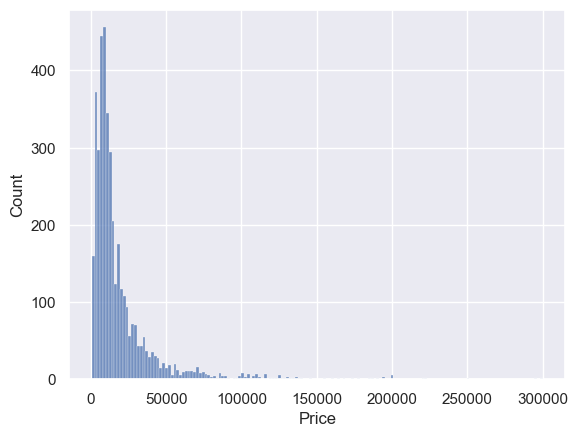

In [10]:
sns.histplot(data_no_mv['Price'])

### Dealing with Outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)

In [12]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

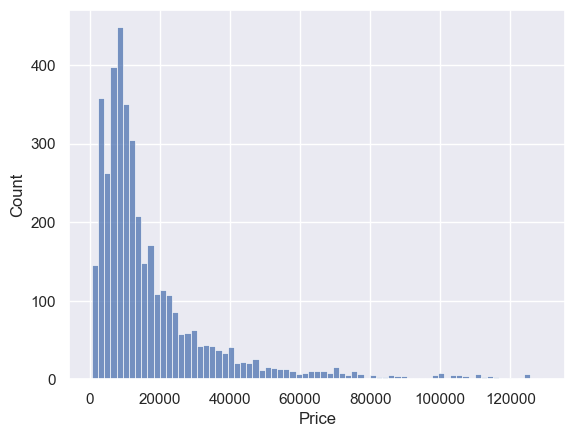

In [13]:
sns.histplot(data_1['Price'])

> we will make it also with Mileage , EngineV and Year 

 **First with Mileage**

<Axes: xlabel='Mileage', ylabel='Count'>

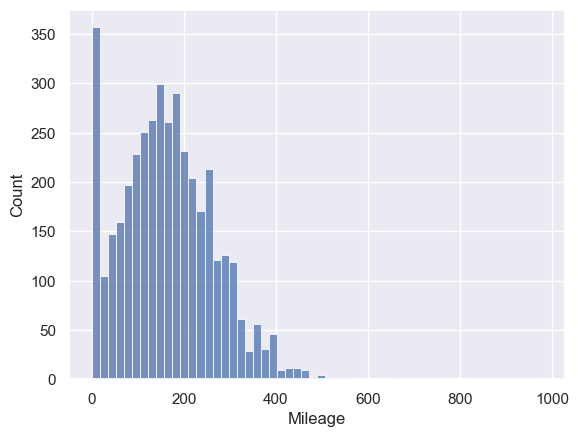

In [14]:
sns.histplot(data_no_mv['Mileage'])

In [15]:
q_mileage = data_1['Mileage'].quantile(.99)

In [16]:
data_2 = data_1[data_1['Mileage']<q_mileage]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


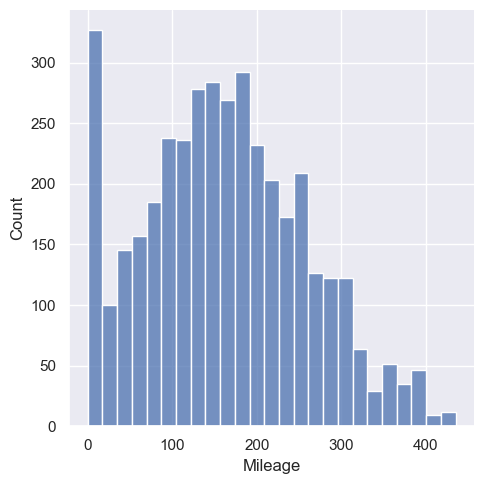

In [17]:
sns.displot(data_2['Mileage'])

**Second With EngineV**

<Axes: xlabel='EngineV', ylabel='Count'>

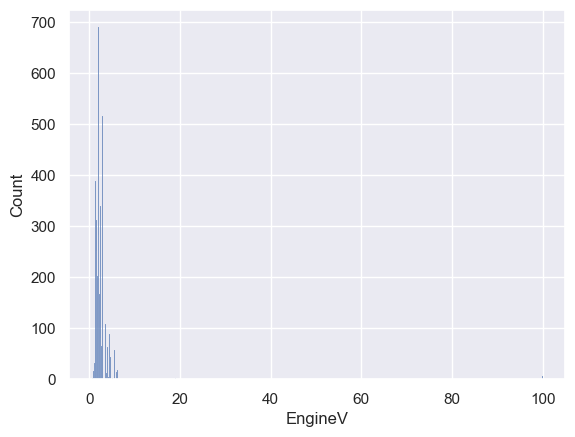

In [18]:
sns.histplot(data_no_mv["EngineV"])

In [19]:
q_EngV= data_no_mv['EngineV'].quantile(.99)
data_3 = data_2[data_2['EngineV']<q_EngV]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


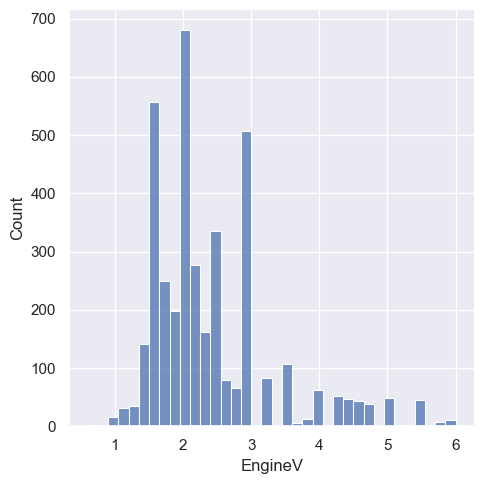

In [20]:
sns.displot(data_3['EngineV'])

**Third With Year**

In [21]:
q_year = data_no_mv['Year'].quantile(.01)
data_4 = data_3[data_3['Year']>q_year]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


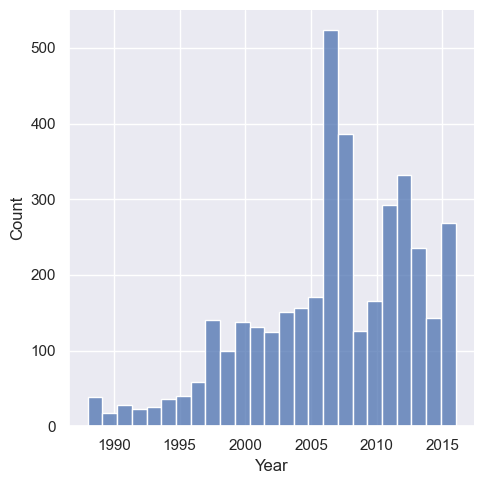

In [22]:
sns.displot(data_4['Year'])

In [23]:
data_cleaned = data_4.reset_index(drop=True)

In [24]:
data_cleaned.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3851,3851.00000,3851,3851.000000,3851.000000,3851,3851,3851.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1458,NaN,NaN,1807,3489,NaN
mean,NaN,18076.98263,NaN,160.837445,2.434524,NaN,NaN,2006.699039
std,NaN,19004.80061,NaN,95.680787,0.918583,NaN,NaN,6.112839
min,NaN,800.00000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.00000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.00000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.00000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


# Checking The OLS assumptions

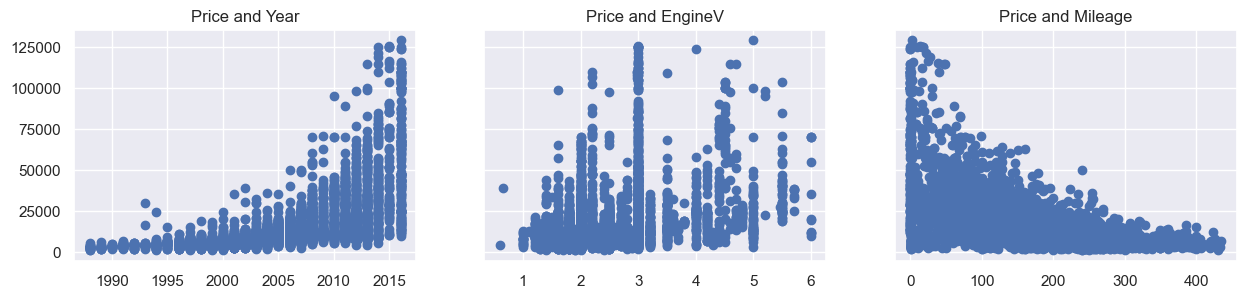

In [25]:
# first we Will check linearality for scatter plot 
#  since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (for compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

### **Relaxing The assumptions**

In [26]:
# Let's transform 'Price' with a log transformation
# Then we add it to our data frame
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [27]:
# Check data and new results 
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3846,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3847,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3848,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3849,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


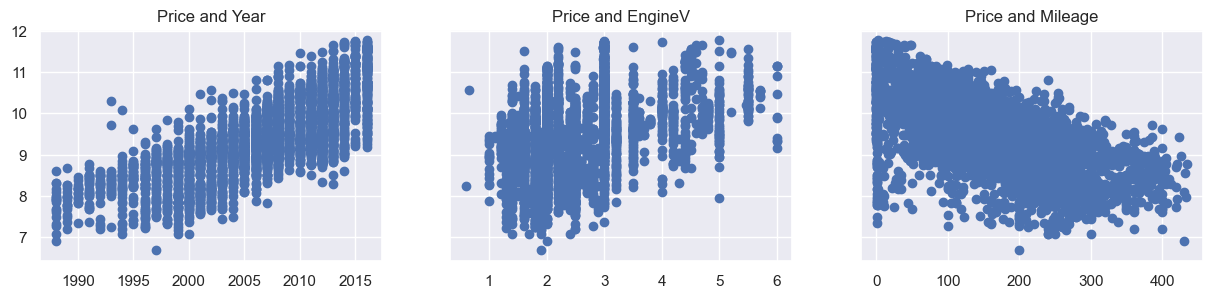

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material
# Alternatively we could have transformed each of the independent variables

In [29]:
# We will use log price in all comming tasks , so i will drop old price 
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

In [30]:
# Here we check 4 samples of this data 
data_cleaned.sample(4)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
1677,Renault,vagon,117,1.5,Diesel,yes,2008,8.630522
3049,Mitsubishi,crossover,0,2.4,Diesel,yes,2016,10.736397
1682,Mitsubishi,sedan,165,1.6,Petrol,yes,2006,8.612503
830,BMW,sedan,230,3.0,Diesel,no,2003,8.038835


### Multicollinearity 

In [31]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [32]:
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif['features'] = variables.columns
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
# Finally, I like to include names so it is easier to explore the result

In [33]:
# Shows Results 
vif

,VIF,features
0,3.800838,Mileage
1,10.607002,Year
2,8.026645,EngineV


In [34]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

# **Create Dummy Variables** 

In [35]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity , drop_first= True)

In [36]:
data_with_dummies.sample(4)

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
3365,97,3.0,10.839581,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3404,174,2.6,9.230143,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2170,149,2.0,9.409109,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2608,63,2.0,10.925129,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


### Rearange a bit 

In [37]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [38]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [39]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head(3)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


# **Linear Regression Model** 

### **Declare the inputs and the Targets** 

In [40]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis =1)

### **Scale Data** 

In [41]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [42]:
inputs_scaled = scaler.transform(inputs)

## **Training & Testing** 

In [43]:
x_train , x_test , y_trian , y_test = train_test_split(inputs_scaled ,targets , test_size= .2 , random_state= 42 )

# **The Regression** 

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_trian)

LinearRegression()

In [45]:
y_hat = reg.predict(x_train)

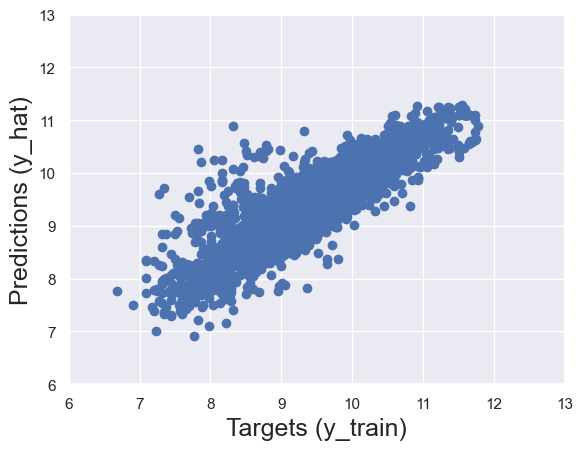

In [46]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_trian, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Residuals PDF')

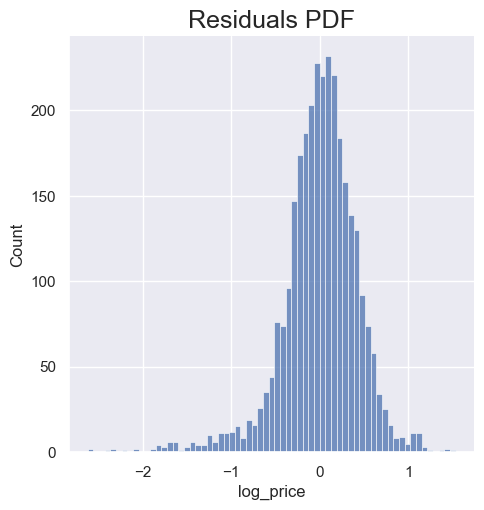

In [47]:
sns.displot(y_trian - y_hat)
plt.title('Residuals PDF' , size = 18)

In [48]:
reg.score(x_train , y_trian)

0.7514828723716583

#### Finding Weights and Bias 

In [49]:
reg.intercept_

9.413885449960139

In [50]:
reg.coef_

array([-0.45507032,  0.21525185,  0.02751634,  0.01814109, -0.12946097,
       -0.16865732, -0.05051162, -0.08564372, -0.14003579, -0.09494359,
       -0.18426248, -0.11906396, -0.16188117, -0.12898231, -0.03000185,
       -0.15508041,  0.32149381])

# **Creating Summary Table for Features and Weights** 

In [51]:
reg_summary = pd.DataFrame(inputs.columns.values , columns= ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.455070
1,EngineV,0.215252
2,Brand_BMW,0.027516
3,Brand_Mercedes-Benz,0.018141
4,Brand_Mitsubishi,-0.129461
5,Brand_Renault,-0.168657
6,Brand_Toyota,-0.050512
7,Brand_Volkswagen,-0.085644
8,Body_hatch,-0.140036
9,Body_other,-0.094944


**From this weights interpretation (Continous Variables) :**

 > A Positive Weights shows that as a feature increases in value, so do the lo_price and 'Price' 
 
 > A Negative Weights shows that as a feature increases in value, lo_price and 'Price' decrease 



In [52]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

**From this weights interpretation (Dummy Variables) :**

 > A Positive Weights shows that the repective category as (Brand) is more expensive than the benchmark (Audi)
 
 > A Negative Weights shows that the repective category as (Brand) is less expensive than the benchmark (Audi)

# **Testing** 

In [53]:
y_hat_test = reg.predict(x_test)

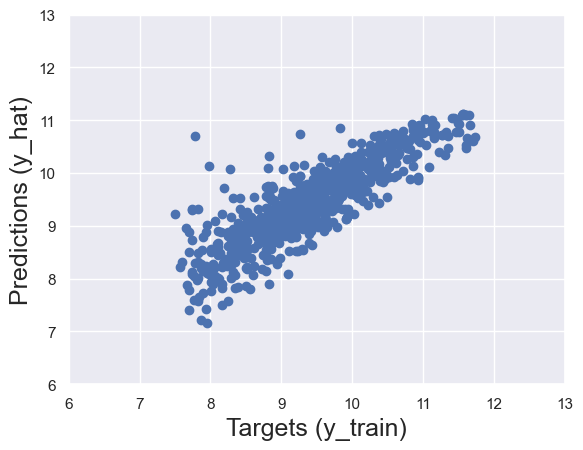

In [54]:
plt.scatter(y_test, y_hat_test)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

> From this graph we see that :

`For Higher prices we higher concentration of values around the 45 degree line , there for our model is very good for predicting higher prices` 


 `For lower ones the situation here is not so amazing , they much more scatted we will not quite get prices in right way`

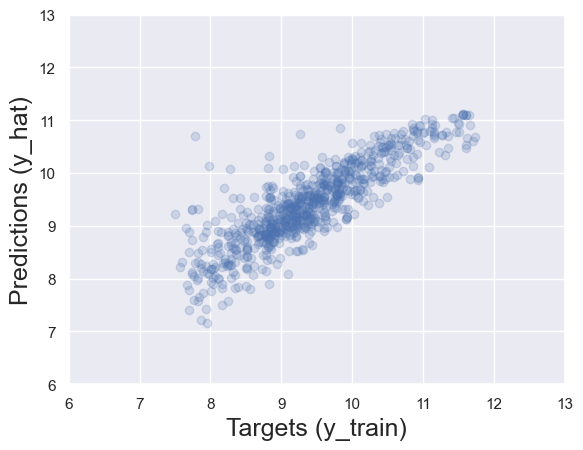

In [55]:
# we will add alph takes values from zero to one with one being the defualt 
plt.scatter(y_test, y_hat_test, alpha=0.2 )
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

> `The more saturated the color , the higher the concentration`

# **Data Performance** 

In [56]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.sample(5)

,Prediction
230,8084.964896
38,6403.602251
581,31210.496693
510,8672.116207
137,35138.590397


In [57]:
df_pf.head()

,Prediction
0,3187.358097
1,9844.365326
2,2694.945527
3,10144.066890
4,16361.554558


In [58]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3187.358097,4200.0
1,9844.365326,NaN
2,2694.945527,NaN
3,10144.066890,NaN
4,16361.554558,NaN
...,...,...
766,11271.572467,NaN
767,16706.817199,NaN
768,9936.065572,NaN
769,37764.176234,NaN


`After displaying y_test, we find what the issue is The old indexes are preserved`

In [59]:
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test= y_test.reset_index(drop=True)

In [60]:
# See Results 
y_test.sample(5)

196     9.615139
340    11.156251
604     8.888067
726     8.779557
519     8.517193
Name: log_price, dtype: float64

In [61]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)

In [62]:
# Let's Check the result 
df_pf

,Prediction,Target
0,3187.358097,4200.0
1,9844.365326,9599.0
2,2694.945527,3500.0
3,10144.066890,12400.0
4,16361.554558,18950.0
...,...,...
766,11271.572467,7900.0
767,16706.817199,10500.0
768,9936.065572,9400.0
769,37764.176234,46900.0


In [63]:
# we can calculate the difference between the targets and the predictions
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [64]:
df_pf.sample(4)

,Prediction,Target,Residual
393,13546.030598,12999.0,-547.030598
770,66033.200075,110000.0,43966.799925
562,8494.059961,7150.0,-1344.059961
672,8766.410593,7777.0,-989.410593


In [65]:
# We take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [66]:
df_pf.sample(3)

,Prediction,Target,Residual,Difference%
284,17867.626984,18700.0,832.373016,4.451193
404,18374.672138,14500.0,-3874.672138,26.721877
442,56575.538594,97500.0,40924.461406,41.973807


In [67]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,771.000000,771.000000,771.000000,771.000000
mean,16081.071351,18119.893333,2038.821982,39.333754
std,12980.119602,20363.171221,11482.193763,84.000144
min,1293.047172,1800.000000,-42122.525069,0.006599
25%,7399.186709,6725.000000,-2468.316644,10.829161
50%,11698.803302,10999.000000,-95.289125,24.153449
75%,20238.600531,20300.000000,2990.509883,42.420268
max,67310.900735,125000.000000,81730.207739,1755.105211


### Check Outputs Manually 

In [68]:
pd.options.display.max_rows = 999
# to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
63,51996.57,52000.00,3.43,0.01
355,17815.04,17800.00,-15.04,0.08
657,38255.29,38300.00,44.71,0.12
565,13635.91,13600.00,-35.91,0.26
523,17938.45,18000.00,61.55,0.34
627,6528.56,6500.00,-28.56,0.44
517,61194.03,61500.00,305.97,0.50
535,5768.58,5800.00,31.42,0.54
403,5983.94,5950.00,-33.94,0.57
742,17608.36,17500.00,-108.36,0.62


> FROM--LAST--TABLE--WE--SEE--THAT :

>>`it's interesting to explore the ones that have biggest differences going to the buttom of the dataframe we see that there are vey few predication if we look at colums of Difference% and Target from end the prices are extermaly low (target)` 

>>`As we know , our model is using the mileage , engine valume , brand , registration and body type to predict the price of used car ....on average it's pretty decent in predicating the price` 

>>`All Residual for these(last rows ) outliers are negitive , therefore their predication are higher than the targets` 

  >>>`.  Explanation of this may be that we are missing an important factor which drives the price  of a used car lower , may be model of the car which we removed from our features at the beginning of the analysis` 

  >>>`.  Also can may be that car was damaged in some way , A piece of information we did not have` 
    
